# N dimensional XOR

Es un problema lógico en el que el objetivo es aprender la función XOR, que devuelve 1 si solo uno de los dos bits de entrada es 1 y 0 si ambos son iguales (es decir, 0 XOR 0 = 0, 1 XOR 1 = 0, 1 XOR 0 = 1, 0 XOR 1 = 1) pero en lugar de con dos bits con n (En este caso, n = 12).

Los valores de los hiperparámetros con los que obtuve los resultados son:
- Optimizador: Adam
- Learning rate: 0.002
- Epochs :  150
- Función de Activación : Sigmoide
- Capas de la Red : 5
- Neuronas de cada capa : 12, 25, 15, 10, 8 y 1

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from main.neural_network import train, predict, test_loss, create_nn
from main.nn_components.draw_nn import draw_nn
from main.nn_components.activations_functions import Relu, Tanh, LeakyRelu, Sigmoid
from main.nn_components.loss_functions import MSELoss
from main.nn_components.optimazers import SGD, Adam, Momentum, Adagrad, RMSProp
from sklearn.model_selection import train_test_split
from itertools import product
from main.nn_components.graphic_regression import learning_curve
from main.nn_components.graphic_regression import dispersion_graph

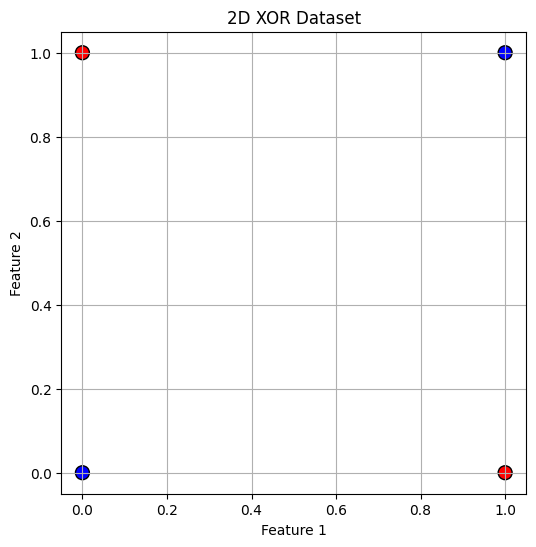

In [40]:
def generate_n_dimensional_xor(n):
    X = np.array(list(product([0, 1], repeat=n)))
    y = np.sum(X, axis=1) % 2
    
    X = X.reshape(2**n, n, 1)
    y = y.reshape(2**n, 1)
    
    return X, y

X, y = generate_n_dimensional_xor(2)

x_coords = X[:, 0, 0]
y_coords = X[:, 1, 0]

# Crear gráfica con colores basados en la clase
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, c=['red' if label == 1 else 'blue' for label in y], s=100, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D XOR Dataset')
plt.grid(True)
plt.show()

In [41]:
%matplotlib notebook
X, y = generate_n_dimensional_xor(3)

x_coords = X[:, 0, 0]
y_coords = X[:, 1, 0]
z_coords = X[:, 2, 0]

# Plot 3D points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c=['red' if label == 1 else 'blue' for label in y], s=100, edgecolors='k')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D XOR Dataset')
plt.show()

%matplotlib inline

<IPython.core.display.Javascript object>

In [55]:
X, y = generate_n_dimensional_xor(12)

X_train, X_test, y_train, y_test = train_test_split(X, y)

optimizers = [
    Adam(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adam(learning_rate=0.002)
]

activations = [Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid()]

loss = MSELoss()

nn = create_nn([12, 25, 15, 10, 8, 1], activations, optimizers)

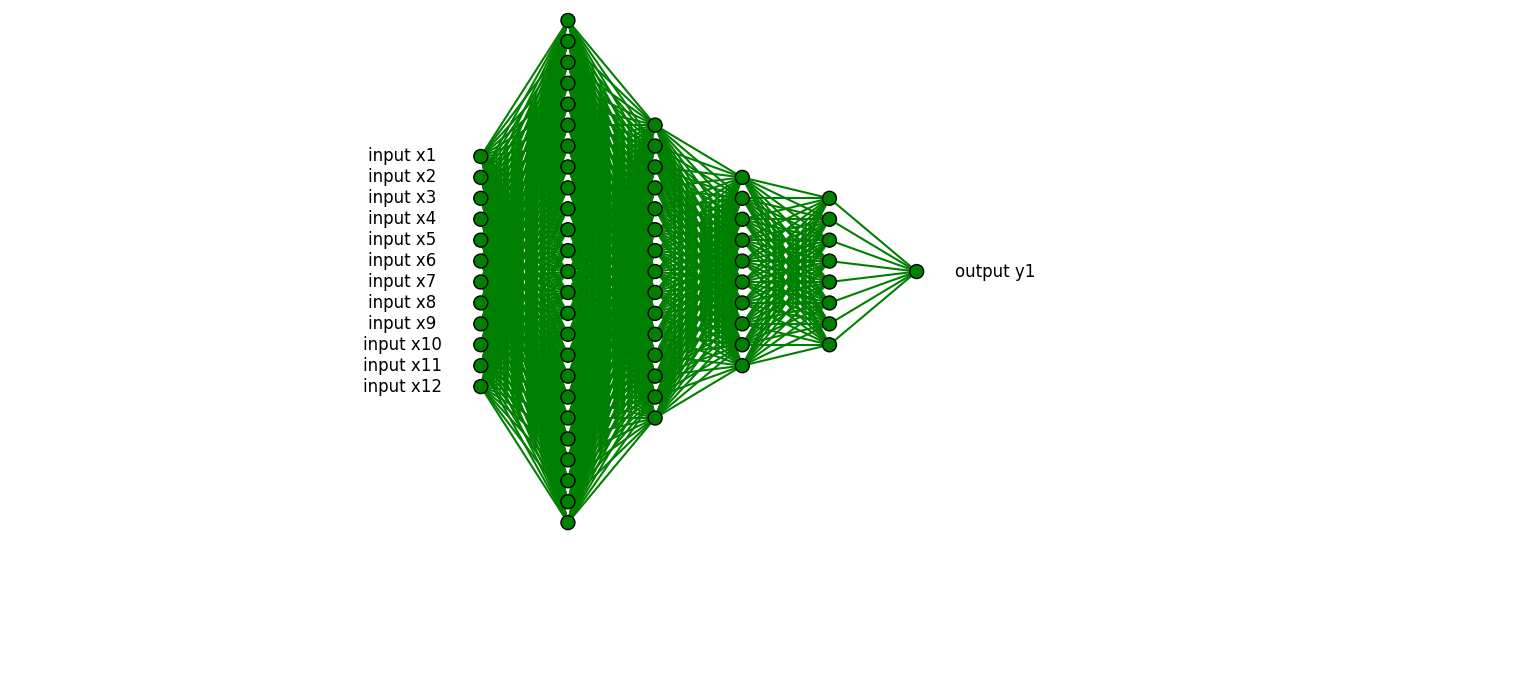

In [56]:
draw_nn(nn)

In [57]:
train_loss = train(nn, loss, X_train, y_train, epochs=200)

Final Loss = 0.005029149060432047


In [58]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.004819060195099415


In [59]:
y_pred = []
for X, y in zip(X_test, y_test):
    output = predict(nn, X)
    y_pred.append(output)
    print(f'Pred: {output}, Actual: {y}')

Pred: [[1.54323219e-09]], Actual: [0]
Pred: [[0.99977206]], Actual: [1]
Pred: [[0.99962892]], Actual: [1]
Pred: [[7.96073923e-06]], Actual: [0]
Pred: [[2.34967104e-05]], Actual: [0]
Pred: [[7.08740542e-05]], Actual: [0]
Pred: [[1.54719919e-09]], Actual: [0]
Pred: [[0.99920144]], Actual: [1]
Pred: [[0.99976274]], Actual: [1]
Pred: [[7.10439884e-05]], Actual: [0]
Pred: [[0.99918816]], Actual: [1]
Pred: [[9.25806387e-07]], Actual: [0]
Pred: [[0.9997541]], Actual: [1]
Pred: [[1.55269206e-09]], Actual: [0]
Pred: [[0.99918977]], Actual: [1]
Pred: [[0.00020686]], Actual: [0]
Pred: [[1.63430123e-09]], Actual: [0]
Pred: [[0.99976328]], Actual: [1]
Pred: [[3.31162442e-09]], Actual: [0]
Pred: [[7.8449558e-05]], Actual: [0]
Pred: [[1.94789696e-05]], Actual: [0]
Pred: [[0.99940585]], Actual: [1]
Pred: [[1.64663426e-09]], Actual: [0]
Pred: [[0.00021049]], Actual: [0]
Pred: [[6.9393601e-05]], Actual: [0]
Pred: [[0.99920268]], Actual: [1]
Pred: [[1.88277763e-09]], Actual: [0]
Pred: [[7.40874006e-05]],

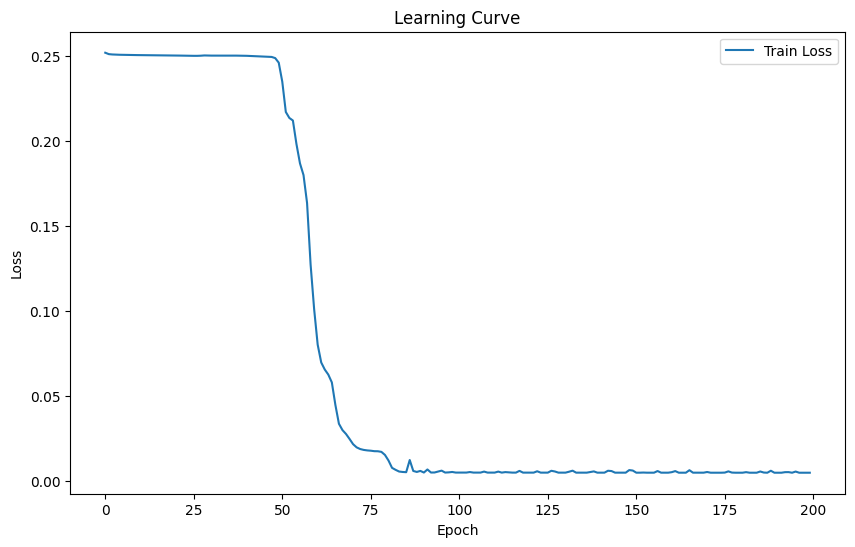

In [60]:
learning_curve(train_loss)

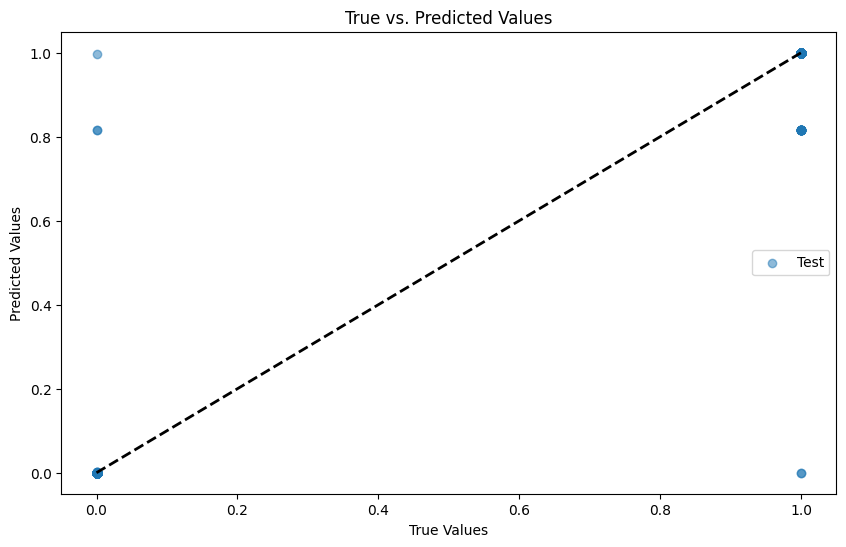

In [61]:
dispersion_graph(y_test, y_pred)

# Experimentos Previos

### Test1

In [64]:
optimizers = [
    Adagrad(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adagrad(learning_rate=0.002),
    Adam(learning_rate=0.002),
    Adagrad(learning_rate=0.002)
]

activations = [Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid(), Sigmoid()]

loss = MSELoss()

nn = create_nn([12, 25, 15, 10, 8, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

Final Loss = 0.2497275935037135


In [65]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.25312808882945914


### Test2

In [66]:
optimizers = [
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003),
    SGD(learning_rate=0.003)
]

activations = [Tanh(), Tanh(), Tanh(), Tanh(), Tanh()]

loss = MSELoss()

nn = create_nn([12, 50, 25, 15, 8, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

Final Loss = 0.15047195784995962


In [67]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.4252852074872323


### Test3

In [68]:
optimizers = [
    RMSProp(learning_rate=0.001),
    Adam(learning_rate=0.001),
    RMSProp(learning_rate=0.001),
    Adam(learning_rate=0.001),
    RMSProp(learning_rate=0.001)
]

activations = [LeakyRelu(), LeakyRelu(), LeakyRelu(), LeakyRelu(), LeakyRelu()]

loss = MSELoss()

nn = create_nn([12, 30, 20, 10, 5, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

Final Loss = 2.85404513140637


In [69]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.521364471622813


### Test4

In [70]:
optimizers = [
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002)
]

activations = [Relu(), Relu(), Relu(), Relu(), Relu()]

loss = MSELoss()

nn = create_nn([12, 40, 30, 20, 8, 1], activations, optimizers)

_ = train(nn, loss, X_train, y_train, epochs=200)

Final Loss = 0.5091145833333334


In [71]:
_ = test_loss(nn, loss, X_test, y_test)

Loss in test = 0.47265625
